<a href="https://colab.research.google.com/github/SamuilMladenov/LearnPyTorch/blob/main/01_training_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import all the needed libraries
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create known parameters
quad_coef = 0.5
lin_coef = -1.5
const_coef = 1.0

# Create
start = 0
end = 3
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = quad_coef*(X**2) + lin_coef*X + const_coef

len(X), len(y)

(150, 150)

In [17]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [18]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
    PLots training data, test data  and compares predictions
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

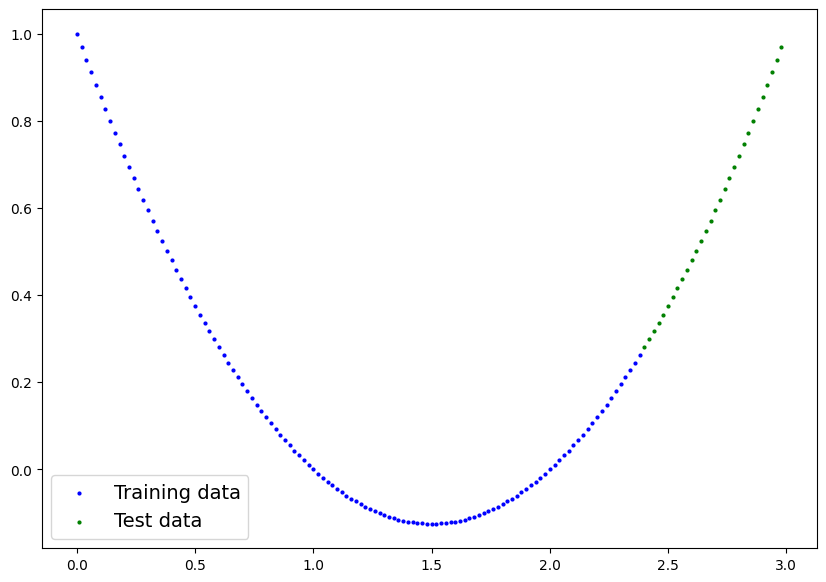

In [19]:
plot_predictions()

In [26]:
# Create the model class
class QuadraticRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.quad_coef = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.lin_coef = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.const_coef = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.quad_coef * x ** 2 + self.lin_coef * x + self.const_coef

In [27]:
# Manual seed
torch.manual_seed(42)

quad_reg_model = QuadraticRegressionModel()

quad_reg_model.state_dict()


OrderedDict([('quad_coef', tensor([0.3367])),
             ('lin_coef', tensor([0.1288])),
             ('const_coef', tensor([0.2345]))])

In [28]:
with torch.inference_mode():
  y_preds = quad_reg_model(X_test)

y_preds

tensor([[2.4829],
        [2.5180],
        [2.5533],
        [2.5888],
        [2.6247],
        [2.6608],
        [2.6972],
        [2.7338],
        [2.7707],
        [2.8079],
        [2.8454],
        [2.8831],
        [2.9211],
        [2.9594],
        [2.9979],
        [3.0367],
        [3.0758],
        [3.1151],
        [3.1547],
        [3.1946],
        [3.2348],
        [3.2752],
        [3.3159],
        [3.3568],
        [3.3981],
        [3.4396],
        [3.4813],
        [3.5234],
        [3.5657],
        [3.6083]])

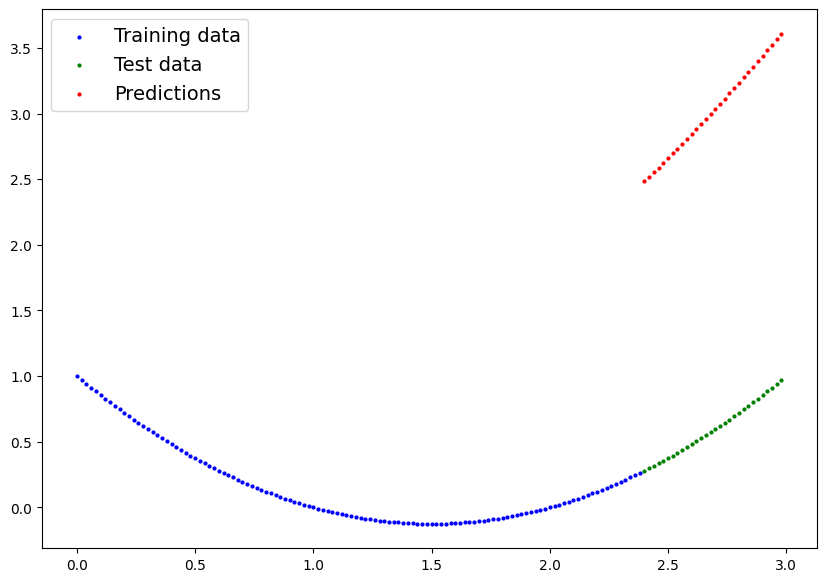

In [29]:
plot_predictions(predictions=y_preds)

In [30]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.SGD(params=quad_reg_model.parameters(),
                            lr=0.0001)

In [ ]:
# Training and testingloop

epochs = 1200

#Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  quad_reg_model.train()

  y_pred = quad_reg_model(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  quad_reg_model.eval()
  with torch.inference_mode():
    test_pred = quad_reg_model(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(quad_reg_model.state_dict())
